## Goals of thie flie: Reduce the columns volume and Run K-means cluster

### 1. Exclude and set aside text information for later analysis. 
### 2. Reduce columns numbers by compressing techiniques (PCA). 
### 3. Run K-means cluster to find the group that are suitable for new housing the most.

In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = 300
pd.options.display.max_rows = 300
pd.set_option('display.max_colwidth',300)

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn import metrics
import sys
sys.setrecursionlimit(100000)

import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
data = pd.read_csv('/Users/satokosuda/dataforcause/new_story_data/dataset.csv')

In [3]:
# Drop features with text contents because I don't try text clustering at this stage.
data = \
data.drop(['Tent ID','Family Bacgkround','Problems in the Tent - Additional Comments','Do you have any other comments, questions or other information you’d like to add?','Would living in a block home create any changes in your life?','Additional Comments - Health'],axis=1)

In [4]:
# Just for the sake of excercise, let's visualize the distribution of each feature to learn which transformation is apporpriate.
# It's easier to transform all features to center in zero and divided by unit variance (using 'scale' as below). However, we may improve
# algorithm performance by customizing transformation for each feature.

# I can try other clustering methods(ideally Euclidian distance models, becuse otherwise I have to redo feature scalings).

### Experiment: 

### Create 2 data sets (one is all features including sperse features are standardised, another is all except sparese ### features are standardised). Then run cluster on both data sets and see which data set produce the better result.

In [5]:
# Data1 standardise all features including sparse features (turn them into dense feature)
data1 = pd.DataFrame(scale(data), columns=data.columns)

In [6]:
data1.tail()

,# of Tent Residents,# of Years Living in Village,# of Years Living in Tent,How often do you get sick?,"How often do you have friends, family or neighborhoods over to your tent?",HH1 Female,HH1 Male,HH1 Agriculture/Fish,HH1 Contracted Worker,HH1 Driver,HH1 Family Provides,HH1 Laundry / Servant,HH1 Laundry/Housekeeper,HH1 Lesiv/Servant,HH1 Nothing,HH1 Other,HH1 Paid Consistent Job,HH1 Small business outside or nearby the home,HH1 Student,HH1 Vendor,Sleep Length,Number of Residents with Income,Do you normally wake up at night?,Do you ever have trouble staying awake during the day?,Underage kids in the family %,Water Usage (gallon) per resident per day,Children Living Elsewhere No,Children Living Elsewhere Yes,Rent or Own Elsewhere No,Rent or Own Elsewhere Yes,Kids Education No,Kids Education No Response,Kids Education Some,Kids Education Yes,Ownership Other,Ownership Yes,Ownership Rent,Previous Ownership Live with Family,Previous Ownership No Response,Previous Ownership Other,Previous Ownership Own House,Previous Ownership Rent,Marital Status Common Law,Marital Status Married,Marital Status Other,Marital Status Single,Marital Status Widow,Suffer from cough or congestion? No,Suffer from cough or congestion? Yes,Suffer from bronchitis or pneumonia? No,Suffer from bronchitis or pneumonia? Yes,Suffer from diarrhea? No,Suffer from diarrhea? No Response,Suffer from diarrhea? Yes,Do you have access to a latrine? No,Do you have access to a latrine? Yes,Do you have electricity in your tent? No,Do you have electricity in your tent? Yes,Main source of drinking water:Buy,Main source of drinking water:No,Main source of drinking water:Pump or well,"Main source of drinking water:Pump, well, or buy",Do you ever drink water that isn't treated? No Response,Do you ever drink water that isn't treated? No,Do you ever drink water that isn't treated? Yes,Is there any risk that the tent will collapse? No,Is there any risk that the tent will collapse? Yes,In the past year did someone enter your house to steal something? No,In the past year did someone enter your house to steal something? Yes,Do you have space to lie down if tired? No,Do you have space to lie down if tired? Yes,Do people living in the tent have space to keep their personal belongings? No,Do people living in the tent have space to keep their personal belongings? Yes,"In this tent, if someone wakes up, do they wake up the other people? No","In this tent, if someone wakes up, do they wake up the other people? Yes",Do children have safe places to study? No,Do children have safe places to study? Yes,Does your household own any animals? No,Does your household own any animals? Yes,Does your household own a radio? No,Does your household own a radio? Yes,Do you feel safe in your home? No,Do you feel safe in your home? Yes,Do you feel safe leaving your children alone at home? No,Do you feel safe leaving your children alone at home? Yes,Do you feel safe walking in the community at night? No,Do you feel safe walking in the community at night? Yes,Do you own the land the tent is on? No,Do you own the land the tent is on? Yes,"If you were to receive a house, would you be willing to move to the area behind Healing Haiti? No","If you were to receive a house, would you be willing to move to the area behind Healing Haiti? Yes",Do you feel this person qualifies for a home? No,Do you feel this person qualifies for a home? Yes,"What are the dwellings floors made of? Ceramic, wood, concrete",What are the dwellings floors made of? Dirt or soil,What are the dwellings roof made of? Tarp,What are the dwellings roof made of? Tin
521,-0.488240,-0.434635,-2.665435,0.143174,0.114311,-1.302857,1.302857,-0.237118,2.378703,-0.06178,-0.043644,-0.075737,-0.06178,-0.043644,-0.658212,-0.358825,-0.198811,-0.664151,-0.107417,-0.087538,-0.102947,0.791420,-0.513396,0.946908,-0.245620,-0.337793,0.549527,-0.549527,0.06178,-0.06178,1.990544,-0.378785,-0.643412,-0.783260,-0.116136,0.324102,-0.298374,-0.324102,-0.075737,-0.075737,-0

In [7]:
#Data2 standardise all features except sparse features
data_standard = \
data.loc[:,['# of Tent Residents','# of Years Living in Village','# of Years Living in Tent','How often do you get sick?','How often do you have friends, family or neighborhoods over to your tent?','Do you normally wake up at night?','Do you ever have trouble staying awake during the day?','Underage kids in the family %','Water Usage (gallon) per resident per day','Sleep Length','Number of Residents with Income']]
data_scaled = pd.DataFrame(scale(data_standard), columns=data_standard.columns)

In [8]:
data_noscaled = \
data.drop(['# of Tent Residents','# of Years Living in Village','# of Years Living in Tent','How often do you get sick?','How often do you have friends, family or neighborhoods over to your tent?','Do you normally wake up at night?','Do you ever have trouble staying awake during the day?','Underage kids in the family %','Water Usage (gallon) per resident per day','Sleep Length','Number of Residents with Income'], axis=1)

In [9]:
data2 = pd.concat([data_scaled, data_noscaled], axis=1)

In [10]:
data2.head()

,# of Tent Residents,# of Years Living in Village,# of Years Living in Tent,How often do you get sick?,"How often do you have friends, family or neighborhoods over to your tent?",Do you normally wake up at night?,Do you ever have trouble staying awake during the day?,Underage kids in the family %,Water Usage (gallon) per resident per day,Sleep Length,Number of Residents with Income,HH1 Female,HH1 Male,HH1 Agriculture/Fish,HH1 Contracted Worker,HH1 Driver,HH1 Family Provides,HH1 Laundry / Servant,HH1 Laundry/Housekeeper,HH1 Lesiv/Servant,HH1 Nothing,HH1 Other,HH1 Paid Consistent Job,HH1 Small business outside or nearby the home,HH1 Student,HH1 Vendor,Children Living Elsewhere No,Children Living Elsewhere Yes,Rent or Own Elsewhere No,Rent or Own Elsewhere Yes,Kids Education No,Kids Education No Response,Kids Education Some,Kids Education Yes,Ownership Other,Ownership Yes,Ownership Rent,Previous Ownership Live with Family,Previous Ownership No Response,Previous Ownership Other,Previous Ownership Own House,Previous Ownership Rent,Marital Status Common Law,Marital Status Married,Marital Status Other,Marital Status Single,Marital Status Widow,Suffer from cough or congestion? No,Suffer from cough or congestion? Yes,Suffer from bronchitis or pneumonia? No,Suffer from bronchitis or pneumonia? Yes,Suffer from diarrhea? No,Suffer from diarrhea? No Response,Suffer from diarrhea? Yes,Do you have access to a latrine? No,Do you have access to a latrine? Yes,Do you have electricity in your tent? No,Do you have electricity in your tent? Yes,Main source of drinking water:Buy,Main source of drinking water:No,Main source of drinking water:Pump or well,"Main source of drinking water:Pump, well, or buy",Do you ever drink water that isn't treated? No Response,Do you ever drink water that isn't treated? No,Do you ever drink water that isn't treated? Yes,Is there any risk that the tent will collapse? No,Is there any risk that the tent will collapse? Yes,In the past year did someone enter your house to steal something? No,In the past year did someone enter your house to steal something? Yes,Do you have space to lie down if tired? No,Do you have space to lie down if tired? Yes,Do people living in the tent have space to keep their personal belongings? No,Do people living in the tent have space to keep their personal belongings? Yes,"In this tent, if someone wakes up, do they wake up the other people? No","In this tent, if someone wakes up, do they wake up the other people? Yes",Do children have safe places to study? No,Do children have safe places to study? Yes,Does your household own any animals? No,Does your household own any animals? Yes,Does your household own a radio? No,Does your household own a radio? Yes,Do you feel safe in your home? No,Do you feel safe in your home? Yes,Do you feel safe leaving your children alone at home? No,Do you feel safe leaving your children alone at home? Yes,Do you feel safe walking in the community at night? No,Do you feel safe walking in the community at night? Yes,Do you own the land the tent is on? No,Do you own the land the tent is on? Yes,"If you were to receive a house, would you be willing to move to the area behind Healing Haiti? No","If you were to receive a house, would you be willing to move to the area behind Healing Haiti? Yes",Do you feel this person qualifies for a home? No,Do you feel this person qualifies for a home? Yes,"What are the dwellings floors made of? Ceramic, wood, concrete",What are the dwellings floors made of? Dirt or soil,What are the dwellings roof made of? Tarp,What are the dwellings roof made of? Tin
0,-0.488240,4.217744,0.664776,1.894552,0.114311,2.676129,0.279249,1.078692,0.088563,-0.102947,-0.867094,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,

In [11]:
samples, features = data1.shape
print(samples, features)

526 97


In [12]:
samples, features = data2.shape
print(samples, features)

526 97


### Fit models with different specifications (such as # of clusters). 
### Use 1. Silhouette Score, 2. Davies Bouldin Score, 3. Calinski Harabaz Score to decide the fit of the cluster to the data 

In [13]:
model1 = KMeans(init='k-means++', n_clusters =2, n_init=10, max_iter=500).fit(data1)
model2 = KMeans(init='k-means++', n_clusters =9, n_init=10, max_iter=500).fit(data1)
model3 = KMeans(init='k-means++', n_clusters =20, n_init=10, max_iter=500).fit(data1)

In [14]:
# How to read Silhouette Score :: -1 indicates the poorest while 1 indicates the best. metrics close to 0 
# indicates overwrap in cluster memberships
metrics.silhouette_score(data1, model1.labels_, metric='euclidean')

0.06563858812890322

In [15]:
# How to read Davies Bouldin Score :: Score close to 0 indicates the better partition
metrics.davies_bouldin_score(data1, model1.labels_)

3.6724369012881977

In [16]:
# How to read Calinski Harabaz Score :: the higher the score, the better the fit
metrics.calinski_harabasz_score(data1, model1.labels_)

30.932675772690022

### Finding 1:Increasing the number of partitions doesn't improve the quality of clustering on Data 1

In [17]:
print(metrics.silhouette_score(data1, model2.labels_, metric='euclidean'),metrics.davies_bouldin_score(data1, model2.labels_),metrics.calinski_harabasz_score(data1, model2.labels_),metrics.silhouette_score(data1, model3.labels_, metric='euclidean'),metrics.davies_bouldin_score(data1, model3.labels_),metrics.calinski_harabasz_score(data1, model3.labels_))

0.049059471190887806 2.4282019126911223 18.624411317601655 0.05744980623041662 2.0521202634004707 15.066876052585862


In [18]:
model1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,

In [19]:
labels = pd.DataFrame(model1.labels_, index = np.array(range(0,526)), columns=['labels'])

In [20]:
result = data.join(labels)

In [21]:
result.sample(5)

,# of Tent Residents,# of Years Living in Village,# of Years Living in Tent,How often do you get sick?,"How often do you have friends, family or neighborhoods over to your tent?",HH1 Female,HH1 Male,HH1 Agriculture/Fish,HH1 Contracted Worker,HH1 Driver,HH1 Family Provides,HH1 Laundry / Servant,HH1 Laundry/Housekeeper,HH1 Lesiv/Servant,HH1 Nothing,HH1 Other,HH1 Paid Consistent Job,HH1 Small business outside or nearby the home,HH1 Student,HH1 Vendor,Sleep Length,Number of Residents with Income,Do you normally wake up at night?,Do you ever have trouble staying awake during the day?,Underage kids in the family %,Water Usage (gallon) per resident per day,Children Living Elsewhere No,Children Living Elsewhere Yes,Rent or Own Elsewhere No,Rent or Own Elsewhere Yes,Kids Education No,Kids Education No Response,Kids Education Some,Kids Education Yes,Ownership Other,Ownership Yes,Ownership Rent,Previous Ownership Live with Family,Previous Ownership No Response,Previous Ownership Other,Previous Ownership Own House,Previous Ownership Rent,Marital Status Common Law,Marital Status Married,Marital Status Other,Marital Status Single,Marital Status Widow,Suffer from cough or congestion? No,Suffer from cough or congestion? Yes,Suffer from bronchitis or pneumonia? No,Suffer from bronchitis or pneumonia? Yes,Suffer from diarrhea? No,Suffer from diarrhea? No Response,Suffer from diarrhea? Yes,Do you have access to a latrine? No,Do you have access to a latrine? Yes,Do you have electricity in your tent? No,Do you have electricity in your tent? Yes,Main source of drinking water:Buy,Main source of drinking water:No,Main source of drinking water:Pump or well,"Main source of drinking water:Pump, well, or buy",Do you ever drink water that isn't treated? No Response,Do you ever drink water that isn't treated? No,Do you ever drink water that isn't treated? Yes,Is there any risk that the tent will collapse? No,Is there any risk that the tent will collapse? Yes,In the past year did someone enter your house to steal something? No,In the past year did someone enter your house to steal something? Yes,Do you have space to lie down if tired? No,Do you have space to lie down if tired? Yes,Do people living in the tent have space to keep their personal belongings? No,Do people living in the tent have space to keep their personal belongings? Yes,"In this tent, if someone wakes up, do they wake up the other people? No","In this tent, if someone wakes up, do they wake up the other people? Yes",Do children have safe places to study? No,Do children have safe places to study? Yes,Does your household own any animals? No,Does your household own any animals? Yes,Does your household own a radio? No,Does your household own a radio? Yes,Do you feel safe in your home? No,Do you feel safe in your home? Yes,Do you feel safe leaving your children alone at home? No,Do you feel safe leaving your children alone at home? Yes,Do you feel safe walking in the community at night? No,Do you feel safe walking in the community at night? Yes,Do you own the land the tent is on? No,Do you own the land the tent is on? Yes,"If you were to receive a house, would you be willing to move to the area behind Healing Haiti? No","If you were to receive a house, would you be willing to move to the area behind Healing Haiti? Yes",Do you feel this person qualifies for a home? No,Do you feel this person qualifies for a home? Yes,"What are the dwellings floors made of? Ceramic, wood, concrete",What are the dwellings floors made of? Dirt or soil,What are the dwellings roof made of? Tarp,What are the dwellings roof made of? Tin,labels
30,6,25,10.0,1,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9.0,1.0,0,0,0.500000,1.666667,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.

### Reduce column volumes by PCA to see if the model fit inproves

In [22]:
reduced_data1 = PCA(n_components = 20, svd_solver = 'auto', copy = True).fit_transform(data1)

In [23]:
model4 = KMeans(init='k-means++', n_clusters =2, n_init=10, max_iter=500).fit(reduced_data1)

In [24]:
#After PCA data transformation, partition improved
print(metrics.silhouette_score(reduced_data1, model4.labels_, metric='euclidean'),metrics.davies_bouldin_score(reduced_data1, model4.labels_), metrics.calinski_harabasz_score(reduced_data1, model4.labels_))

0.11381210123133671 2.702055525974218 53.09892756303697


In [25]:
reduced_data2 = PCA(n_components = 10, svd_solver = 'auto', copy = True).fit_transform(data1)

In [26]:
model5 = KMeans(init='k-means++', n_clusters =2, n_init=10, max_iter=500).fit(reduced_data2)

In [27]:
# Perform better than model4
print(metrics.silhouette_score(reduced_data2, model5.labels_, metric='euclidean'),metrics.davies_bouldin_score(reduced_data2, model5.labels_), metrics.calinski_harabasz_score(reduced_data2, model5.labels_))

0.17687229628597406 2.09086680469834 84.86813404744333


In [28]:
reduced_data3 = PCA(n_components = 5, svd_solver = 'auto', copy = True).fit_transform(data1)

In [29]:
model6 = KMeans(init='k-means++', n_clusters =2, n_init=10, max_iter=500).fit(reduced_data3)

In [30]:
#Perform much better tahn model4
print(metrics.silhouette_score(reduced_data3, model6.labels_, metric='euclidean'),metrics.davies_bouldin_score(reduced_data3, model6.labels_), metrics.calinski_harabasz_score(reduced_data3, model6.labels_))

0.2826585196962877 1.4830766594341949 147.47923590389024


In [31]:
reduced_data4 = PCA(n_components = 4, svd_solver = 'auto', copy = True).fit_transform(data1)

In [32]:
model7 = KMeans(init='k-means++', n_clusters =2, n_init=10, max_iter=500).fit(reduced_data4)

In [33]:
# Perform even better
print(metrics.silhouette_score(reduced_data4, model7.labels_, metric='euclidean'),metrics.davies_bouldin_score(reduced_data4, model7.labels_), metrics.calinski_harabasz_score(reduced_data4, model7.labels_))

0.3196151464568457 1.3383813104675004 181.15319070756976


In [34]:
reduced_data5 = PCA(n_components = 3, svd_solver = 'auto', copy = True).fit_transform(data1)

In [35]:
model8 = KMeans(init='k-means++', n_clusters =2, n_init=10, max_iter=500).fit(reduced_data5)

### Finding 2 : The further reduce the dementions, the better K-mean cluster performs on Data 1

In [36]:
print(metrics.silhouette_score(reduced_data5, model8.labels_, metric='euclidean'),metrics.davies_bouldin_score(reduced_data5, model8.labels_), metrics.calinski_harabasz_score(reduced_data5, model8.labels_))

0.3755570925182189 1.1597743784719763 236.53519672920916


In [37]:
reduced_data6 = PCA(n_components = 2, svd_solver = 'auto', copy = True).fit_transform(data1)

In [38]:
model9 = KMeans(init='k-means++', n_clusters =2, n_init=10, max_iter=500).fit(reduced_data6)

In [39]:
# Still improves
print(metrics.silhouette_score(reduced_data6, model9.labels_, metric='euclidean'),metrics.davies_bouldin_score(reduced_data6, model9.labels_), metrics.calinski_harabasz_score(reduced_data6, model9.labels_))

0.475160473903073 0.8625423913388336 357.63496239630257


In [40]:
model10 = KMeans(init='k-means++', n_clusters =5, n_init=10, max_iter=500).fit(reduced_data6)

In [41]:
print(metrics.silhouette_score(reduced_data6, model10.labels_, metric='euclidean'),metrics.davies_bouldin_score(reduced_data6, model10.labels_), metrics.calinski_harabasz_score(reduced_data6, model10.labels_))

0.4549220955965703 0.7704294864095955 699.0881609574055


In [42]:
model11 = KMeans(init='k-means++', n_clusters =4, n_init=10, max_iter=500).fit(reduced_data6)

In [43]:
# Still improves
print(metrics.silhouette_score(reduced_data6, model11.labels_, metric='euclidean'),metrics.davies_bouldin_score(reduced_data6, model11.labels_), metrics.calinski_harabasz_score(reduced_data6, model11.labels_))

0.5523572175200313 0.7686301776253613 729.7575286855978


In [44]:
model12 = KMeans(init='k-means++', n_clusters =3, n_init=10, max_iter=500).fit(reduced_data6)

## This is the best result so far on Data 1 : K-Means with cluster # of 3, PCA reduce data to 2 dimenhtional (Bonus: 2 dementional data is good for visualization too!)

In [45]:
print(metrics.silhouette_score(reduced_data6, model12.labels_, metric='euclidean'),metrics.davies_bouldin_score(reduced_data6, model12.labels_), metrics.calinski_harabasz_score(reduced_data6, model12.labels_))

0.5610621271632735 0.6067783232157545 722.6030832605944


### Add labels to  data set 1 for visualization

In [46]:
labels_best = pd.DataFrame(model12.labels_, index = np.array(range(0,526)), columns=['labels'])

In [47]:
result_best = data.join(labels_best)

In [48]:
result_best.head(10) #label 1-Not qualified for home 0-qualified for home

,# of Tent Residents,# of Years Living in Village,# of Years Living in Tent,How often do you get sick?,"How often do you have friends, family or neighborhoods over to your tent?",HH1 Female,HH1 Male,HH1 Agriculture/Fish,HH1 Contracted Worker,HH1 Driver,HH1 Family Provides,HH1 Laundry / Servant,HH1 Laundry/Housekeeper,HH1 Lesiv/Servant,HH1 Nothing,HH1 Other,HH1 Paid Consistent Job,HH1 Small business outside or nearby the home,HH1 Student,HH1 Vendor,Sleep Length,Number of Residents with Income,Do you normally wake up at night?,Do you ever have trouble staying awake during the day?,Underage kids in the family %,Water Usage (gallon) per resident per day,Children Living Elsewhere No,Children Living Elsewhere Yes,Rent or Own Elsewhere No,Rent or Own Elsewhere Yes,Kids Education No,Kids Education No Response,Kids Education Some,Kids Education Yes,Ownership Other,Ownership Yes,Ownership Rent,Previous Ownership Live with Family,Previous Ownership No Response,Previous Ownership Other,Previous Ownership Own House,Previous Ownership Rent,Marital Status Common Law,Marital Status Married,Marital Status Other,Marital Status Single,Marital Status Widow,Suffer from cough or congestion? No,Suffer from cough or congestion? Yes,Suffer from bronchitis or pneumonia? No,Suffer from bronchitis or pneumonia? Yes,Suffer from diarrhea? No,Suffer from diarrhea? No Response,Suffer from diarrhea? Yes,Do you have access to a latrine? No,Do you have access to a latrine? Yes,Do you have electricity in your tent? No,Do you have electricity in your tent? Yes,Main source of drinking water:Buy,Main source of drinking water:No,Main source of drinking water:Pump or well,"Main source of drinking water:Pump, well, or buy",Do you ever drink water that isn't treated? No Response,Do you ever drink water that isn't treated? No,Do you ever drink water that isn't treated? Yes,Is there any risk that the tent will collapse? No,Is there any risk that the tent will collapse? Yes,In the past year did someone enter your house to steal something? No,In the past year did someone enter your house to steal something? Yes,Do you have space to lie down if tired? No,Do you have space to lie down if tired? Yes,Do people living in the tent have space to keep their personal belongings? No,Do people living in the tent have space to keep their personal belongings? Yes,"In this tent, if someone wakes up, do they wake up the other people? No","In this tent, if someone wakes up, do they wake up the other people? Yes",Do children have safe places to study? No,Do children have safe places to study? Yes,Does your household own any animals? No,Does your household own any animals? Yes,Does your household own a radio? No,Does your household own a radio? Yes,Do you feel safe in your home? No,Do you feel safe in your home? Yes,Do you feel safe leaving your children alone at home? No,Do you feel safe leaving your children alone at home? Yes,Do you feel safe walking in the community at night? No,Do you feel safe walking in the community at night? Yes,Do you own the land the tent is on? No,Do you own the land the tent is on? Yes,"If you were to receive a house, would you be willing to move to the area behind Healing Haiti? No","If you were to receive a house, would you be willing to move to the area behind Healing Haiti? Yes",Do you feel this person qualifies for a home? No,Do you feel this person qualifies for a home? Yes,"What are the dwellings floors made of? Ceramic, wood, concrete",What are the dwellings floors made of? Dirt or soil,What are the dwellings roof made of? Tarp,What are the dwellings roof made of? Tin,labels
0,3,60,7.0,4,2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,3,2,0.666667,5.000000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,

### Interpretation of the result so Far:

### Group2 is the least qualified for new houses: They have relatively stable family life (married or with common ### law partners and kids go to school) with better living condition (more space to live confortably, own land tents ### are on),living in the village for a long time and not willing to move for new house.
### Which is the most qualified for new houses? Compare group 0 and group1:
### 1) Ratio of underage kids in the household > Group 0 is higher 2) More heads of houses are unemployed > 
### Group1 Group 0 has higher rate of female house head with constant jobs 3) Less number of residents are 
### employed > Group1 Group 0 has more resident who works
### 4) Group 1 has the lowest kids education level. Group 0 are more serious about education 5) Group 1 has      ### lowest ownership of the tent and previous ownership of the house 6) Group 1 has the least family stability (least number of married couples) 7) Group 0 suffer of Diarrhea the most
### 8) Group 0 has the lowest access to clean water 9) Group 1 more afraid of theft (although have better housing situations) 10) Higher animal ownership for Group 1... do the animals bring any income? (milk, meat etc)
### 11) Group 1 own radio (luxuary) than Group 0 12)Group 1 has the least sense of safety at home (although they have better housing) Group 0 has the most sense of safety although the worst living condition 13) Group 1 has lowest ownership of the land the tent is on 14) Group 0 has the least confortable housing situation (dirt floor, Tarp roof) and social worker feels they are the most qualified
### Conclusion: Group 0 are working family with stability with seady jobs and kids education, previous house owners, yet doesn't have access to clean water
### and in least favorable housing sotuation. They will be successful if they are provided new houses and opportunities.

In [49]:
result_best.groupby('labels').mean()

,# of Tent Residents,# of Years Living in Village,# of Years Living in Tent,How often do you get sick?,"How often do you have friends, family or neighborhoods over to your tent?",HH1 Female,HH1 Male,HH1 Agriculture/Fish,HH1 Contracted Worker,HH1 Driver,HH1 Family Provides,HH1 Laundry / Servant,HH1 Laundry/Housekeeper,HH1 Lesiv/Servant,HH1 Nothing,HH1 Other,HH1 Paid Consistent Job,HH1 Small business outside or nearby the home,HH1 Student,HH1 Vendor,Sleep Length,Number of Residents with Income,Do you normally wake up at night?,Do you ever have trouble staying awake during the day?,Underage kids in the family %,Water Usage (gallon) per resident per day,Children Living Elsewhere No,Children Living Elsewhere Yes,Rent or Own Elsewhere No,Rent or Own Elsewhere Yes,Kids Education No,Kids Education No Response,Kids Education Some,Kids Education Yes,Ownership Other,Ownership Yes,Ownership Rent,Previous Ownership Live with Family,Previous Ownership No Response,Previous Ownership Other,Previous Ownership Own House,Previous Ownership Rent,Marital Status Common Law,Marital Status Married,Marital Status Other,Marital Status Single,Marital Status Widow,Suffer from cough or congestion? No,Suffer from cough or congestion? Yes,Suffer from bronchitis or pneumonia? No,Suffer from bronchitis or pneumonia? Yes,Suffer from diarrhea? No,Suffer from diarrhea? No Response,Suffer from diarrhea? Yes,Do you have access to a latrine? No,Do you have access to a latrine? Yes,Do you have electricity in your tent? No,Do you have electricity in your tent? Yes,Main source of drinking water:Buy,Main source of drinking water:No,Main source of drinking water:Pump or well,"Main source of drinking water:Pump, well, or buy",Do you ever drink water that isn't treated? No Response,Do you ever drink water that isn't treated? No,Do you ever drink water that isn't treated? Yes,Is there any risk that the tent will collapse? No,Is there any risk that the tent will collapse? Yes,In the past year did someone enter your house to steal something? No,In the past year did someone enter your house to steal something? Yes,Do you have space to lie down if tired? No,Do you have space to lie down if tired? Yes,Do people living in the tent have space to keep their personal belongings? No,Do people living in the tent have space to keep their personal belongings? Yes,"In this tent, if someone wakes up, do they wake up the other people? No","In this tent, if someone wakes up, do they wake up the other people? Yes",Do children have safe places to study? No,Do children have safe places to study? Yes,Does your household own any animals? No,Does your household own any animals? Yes,Does your household own a radio? No,Does your household own a radio? Yes,Do you feel safe in your home? No,Do you feel safe in your home? Yes,Do you feel safe leaving your children alone at home? No,Do you feel safe leaving your children alone at home? Yes,Do you feel safe walking in the community at night? No,Do you feel safe walking in the community at night? Yes,Do you own the land the tent is on? No,Do you own the land the tent is on? Yes,"If you were to receive a house, would you be willing to move to the area behind Healing Haiti? No","If you were to receive a house, would you be willing to move to the area behind Healing Haiti? Yes",Do you feel this person qualifies for a home? No,Do you feel this person qualifies for a home? Yes,"What are the dwellings floors made of? Ceramic, wood, concrete",What are the dwellings floors made of? Dirt or soil,What are the dwellings roof made of? Tarp,What are the dwellings roof made of? Tin
labels,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,4.625000,24.350000,6.575000,2.97500,1.825000,0.650000,0.350000,0.025000,0.125000,0.00000,0.000000,0.000000,0.025000,0.000000,0.275000,0.050000,0.025000,0.350000,0.050000,0.075000,9.400000,0.425000,1.500000,1.000000,0.451131,3.712827,0.525000,0.475000,0.975000,0.025000,0.125000,0.025000

### Try out other Euclidian clusters (1. Agglomerative Clustering 2. DBSCAN) to see if they give the better results

In [50]:
model13 = AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='ward').fit(data1)

In [51]:
print(metrics.silhouette_score(data1, model13.labels_, metric='euclidean'),metrics.davies_bouldin_score(data1, model13.labels_), metrics.calinski_harabasz_score(data1, model13.labels_))

0.06158106944960736 3.088169151777565 24.355567994008865


In [52]:
model14 = AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='ward').fit(reduced_data6)

In [53]:
# Very good but not as good as K-Mean
print(metrics.silhouette_score(reduced_data6, model14.labels_, metric='euclidean'),metrics.davies_bouldin_score(reduced_data6, model14.labels_), metrics.calinski_harabasz_score(reduced_data6, model14.labels_))

0.5391158359836145 0.6245857070385673 672.6263069223149


In [54]:
model15 = DBSCAN(eps=20, min_samples=2, metric='euclidean').fit(data1)
print(metrics.silhouette_score(data1, model15.labels_, metric='euclidean'),metrics.davies_bouldin_score(data1, model15.labels_), metrics.calinski_harabasz_score(data1, model15.labels_))

0.5123996839030098 1.8347368317789354 12.09489523086623


In [55]:
# Nothing compared to other 2 algorithms
model16 = DBSCAN(eps=0.5, min_samples=11, metric='euclidean').fit(reduced_data6)
print(metrics.silhouette_score(reduced_data6, model16.labels_, metric='euclidean'),metrics.davies_bouldin_score(reduced_data6, model16.labels_), metrics.calinski_harabasz_score(reduced_data6, model16.labels_))

0.29606547255858506 1.0811701398412141 211.85826715776366


### Finding 3 :  K-Mean is the best clustering method on Data 1 (with all dense features)

### Next Step: Fit clusters to Data 2 (mix of dense and spares features) and see if the result is better than Data 1

In [56]:
# Try K-Mean cluster with dataset2 > Result is better than data1
model17 = KMeans(init='k-means++', n_clusters =3, n_init=10, max_iter=500).fit(data2)
print(metrics.silhouette_score(data2, model17.labels_, metric='euclidean'),metrics.davies_bouldin_score(data2, model17.labels_), metrics.calinski_harabasz_score(data2, model17.labels_))

0.10137224022510034 2.608614207379398 47.76412730738624


### Use Truncated SVD, not PDA to reduce column volumes of Data 2 (spares data ) 

In [57]:
reduced_data7 = PCA(n_components = 20, svd_solver = 'auto', copy = True).fit_transform(data2)
# Should use TruncatedSVD for sparse data like data2 instead
trn = TruncatedSVD(n_components =20, algorithm = 'randomized', n_iter=7)
reduced_data7b = trn.fit_transform(data2)

In [58]:
reduced_data7b[:10]

array([[ 3.83318490e+00, -5.32508175e-01, -8.43327536e-01,
         4.93224517e+00, -8.76049698e-01, -1.01787016e+00,
        -1.67797199e+00,  1.41344136e+00, -2.01085905e+00,
        -1.19751932e+00,  1.90759680e+00, -4.16925225e-01,
         6.44985731e-01, -2.95273310e-01,  5.08442555e-01,
        -1.23359475e-01,  8.55088631e-01,  3.77569916e-01,
         9.45759447e-02,  3.57016703e-01],
       [ 4.41614712e+00, -1.85422004e+00,  2.50929850e+00,
         4.21475490e+00, -1.88169391e-01,  6.20574096e-01,
        -8.95734300e-02,  1.47587011e+00, -2.78196835e-01,
         7.14459861e-02,  2.09758847e+00,  2.00067679e+00,
         5.35289190e-02, -7.83207214e-01,  6.78634805e-01,
         7.74509260e-01,  8.94266984e-02, -6.19346850e-01,
        -4.23866942e-01,  1.20026194e+00],
       [ 4.08661676e+00, -2.98641336e+00,  1.38100336e+00,
         3.28371947e+00,  2.87527398e-01, -1.21397286e+00,
         8.61946456e-01,  1.10654493e+00, -8.93545529e-01,
        -1.39632852e+00,  5.0

In [59]:
model18 = KMeans(init='k-means++', n_clusters =3, n_init=10, max_iter=500).fit(reduced_data7)
print(metrics.silhouette_score(reduced_data7, model18.labels_, metric='euclidean'),metrics.davies_bouldin_score(reduced_data7, model18.labels_), metrics.calinski_harabasz_score(reduced_data7, model18.labels_))

0.12568779221401852 2.308471465516788 59.43136969313825


In [60]:
# TruncatedSVD data > not much improvemdnt
model18b = KMeans(init='k-means++', n_clusters =3, n_init=10, max_iter=500).fit(reduced_data7b)
print(metrics.silhouette_score(reduced_data7b, model18b.labels_, metric='euclidean'),metrics.davies_bouldin_score(reduced_data7b, model18b.labels_), metrics.calinski_harabasz_score(reduced_data7b, model18b.labels_))

0.12820232770655762 2.2896475518053623 60.35087062856885


In [61]:
reduced_data8 = PCA(n_components = 10, svd_solver = 'auto', copy = True).fit_transform(data2)

In [62]:
model19 = KMeans(init='k-means++', n_clusters =3, n_init=10, max_iter=500).fit(reduced_data8)
print(metrics.silhouette_score(reduced_data8, model19.labels_, metric='euclidean'),metrics.davies_bouldin_score(reduced_data8, model19.labels_), metrics.calinski_harabasz_score(reduced_data8, model19.labels_))

0.16935396028015637 1.9356641916460748 79.79530445545919


In [63]:
reduced_data9 = PCA(n_components = 5, svd_solver = 'auto', copy = True).fit_transform(data2)

In [64]:
model20 = KMeans(init='k-means++', n_clusters =3, n_init=10, max_iter=500).fit(reduced_data9)
print(metrics.silhouette_score(reduced_data9, model20.labels_, metric='euclidean'),metrics.davies_bouldin_score(reduced_data9, model20.labels_), metrics.calinski_harabasz_score(reduced_data9, model20.labels_))

0.2460635764383318 1.4606677032398478 138.4221762346041


In [65]:
reduced_data10 = PCA(n_components = 3, svd_solver = 'auto', copy = True).fit_transform(data2)
trn2 = TruncatedSVD(n_components = 3,algorithm = 'randomized', n_iter=7)
reduced_data10b = trn2.fit_transform(data2)

In [66]:
model21 = KMeans(init='k-means++', n_clusters =3, n_init=10, max_iter=500).fit(reduced_data10)
print(metrics.silhouette_score(reduced_data10, model21.labels_, metric='euclidean'),metrics.davies_bouldin_score(reduced_data10, model21.labels_), metrics.calinski_harabasz_score(reduced_data10, model21.labels_))

0.33768482001956346 1.0953483459481734 242.54208939155302


In [68]:
model21b = KMeans(init='k-means++', n_clusters =3, n_init=10, max_iter=500).fit(reduced_data10b)
print(metrics.silhouette_score(reduced_data10b, model21b.labels_, metric='euclidean'),metrics.davies_bouldin_score(reduced_data10b, model21b.labels_), metrics.calinski_harabasz_score(reduced_data10b, model21b.labels_))

0.4525691181304531 0.7849291960144522 483.2739278618911


In [69]:
reduced_data11 = TruncatedSVD(n_components = 2, algorithm ='randomized', n_iter= 7).fit_transform(data2)

## Best result for Data 2: K-Means with cluster # of 3, With reduction of the data to 2 dementional by Truncated SVD

In [70]:
# Best result for data2
model22 = KMeans(init='k-means++', n_clusters =3, n_init=10, max_iter=500).fit(reduced_data11)
print(metrics.silhouette_score(reduced_data11, model22.labels_, metric='euclidean'),metrics.davies_bouldin_score(reduced_data11, model22.labels_), metrics.calinski_harabasz_score(reduced_data11, model22.labels_))

0.4845819912613251 0.6701082147238546 1106.694337219529


### Add labels to data set 2 for visualization

In [71]:
labels_data2 = pd.DataFrame(model22.labels_, index = np.array(range(0,526)), columns=['labels'])

In [72]:
result_data2 = data.join(labels_data2)

In [73]:
result_data2.head(10)

,# of Tent Residents,# of Years Living in Village,# of Years Living in Tent,How often do you get sick?,"How often do you have friends, family or neighborhoods over to your tent?",HH1 Female,HH1 Male,HH1 Agriculture/Fish,HH1 Contracted Worker,HH1 Driver,HH1 Family Provides,HH1 Laundry / Servant,HH1 Laundry/Housekeeper,HH1 Lesiv/Servant,HH1 Nothing,HH1 Other,HH1 Paid Consistent Job,HH1 Small business outside or nearby the home,HH1 Student,HH1 Vendor,Sleep Length,Number of Residents with Income,Do you normally wake up at night?,Do you ever have trouble staying awake during the day?,Underage kids in the family %,Water Usage (gallon) per resident per day,Children Living Elsewhere No,Children Living Elsewhere Yes,Rent or Own Elsewhere No,Rent or Own Elsewhere Yes,Kids Education No,Kids Education No Response,Kids Education Some,Kids Education Yes,Ownership Other,Ownership Yes,Ownership Rent,Previous Ownership Live with Family,Previous Ownership No Response,Previous Ownership Other,Previous Ownership Own House,Previous Ownership Rent,Marital Status Common Law,Marital Status Married,Marital Status Other,Marital Status Single,Marital Status Widow,Suffer from cough or congestion? No,Suffer from cough or congestion? Yes,Suffer from bronchitis or pneumonia? No,Suffer from bronchitis or pneumonia? Yes,Suffer from diarrhea? No,Suffer from diarrhea? No Response,Suffer from diarrhea? Yes,Do you have access to a latrine? No,Do you have access to a latrine? Yes,Do you have electricity in your tent? No,Do you have electricity in your tent? Yes,Main source of drinking water:Buy,Main source of drinking water:No,Main source of drinking water:Pump or well,"Main source of drinking water:Pump, well, or buy",Do you ever drink water that isn't treated? No Response,Do you ever drink water that isn't treated? No,Do you ever drink water that isn't treated? Yes,Is there any risk that the tent will collapse? No,Is there any risk that the tent will collapse? Yes,In the past year did someone enter your house to steal something? No,In the past year did someone enter your house to steal something? Yes,Do you have space to lie down if tired? No,Do you have space to lie down if tired? Yes,Do people living in the tent have space to keep their personal belongings? No,Do people living in the tent have space to keep their personal belongings? Yes,"In this tent, if someone wakes up, do they wake up the other people? No","In this tent, if someone wakes up, do they wake up the other people? Yes",Do children have safe places to study? No,Do children have safe places to study? Yes,Does your household own any animals? No,Does your household own any animals? Yes,Does your household own a radio? No,Does your household own a radio? Yes,Do you feel safe in your home? No,Do you feel safe in your home? Yes,Do you feel safe leaving your children alone at home? No,Do you feel safe leaving your children alone at home? Yes,Do you feel safe walking in the community at night? No,Do you feel safe walking in the community at night? Yes,Do you own the land the tent is on? No,Do you own the land the tent is on? Yes,"If you were to receive a house, would you be willing to move to the area behind Healing Haiti? No","If you were to receive a house, would you be willing to move to the area behind Healing Haiti? Yes",Do you feel this person qualifies for a home? No,Do you feel this person qualifies for a home? Yes,"What are the dwellings floors made of? Ceramic, wood, concrete",What are the dwellings floors made of? Dirt or soil,What are the dwellings roof made of? Tarp,What are the dwellings roof made of? Tin,labels
0,3,60,7.0,4,2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,3,2,0.666667,5.000000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,

### Visualize the best cluster for Data 1

In [74]:
X6 = pd.DataFrame(reduced_data6, columns=['col1','col2'])
X6_mdl12 = X6.join(labels_best)
X6_mdl22 = X6.join(labels_data2)

In [75]:
X6_mdl12.head()

,col1,col2,labels
0,8.471969,6.565068,0
1,3.421144,3.262156,0
2,7.851926,3.115773,0
3,5.173055,3.411861,0
4,5.191747,1.063499,0


<IPython.core.display.Javascript object>


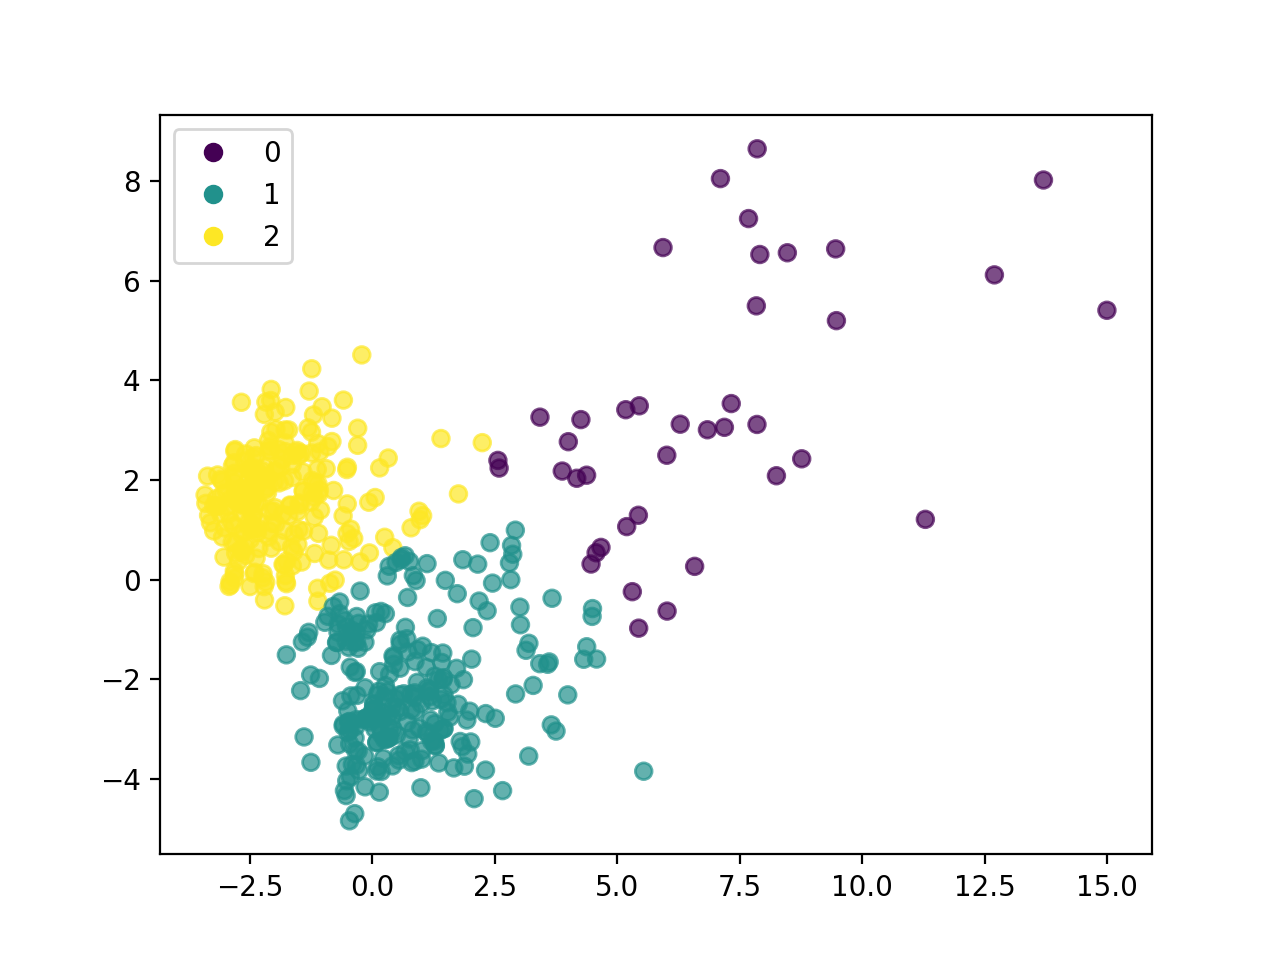

In [76]:
fig1, ax1 = plt.subplots()
scatter = ax1.scatter(X6_mdl12.iloc[:,0], X6_mdl12.iloc[:,1], c= X6_mdl12.loc[:,'labels'], alpha=0.7)
labels = np.unique(X6_mdl12.loc[:,'labels'])
handles = [plt.Line2D([],[],marker="o", ls="", 
                      color=scatter.cmap(scatter.norm(i))) for i in labels]
ax1.legend(handles, labels)

### Visuaize the best cluster for Data 2 

<IPython.core.display.Javascript object>


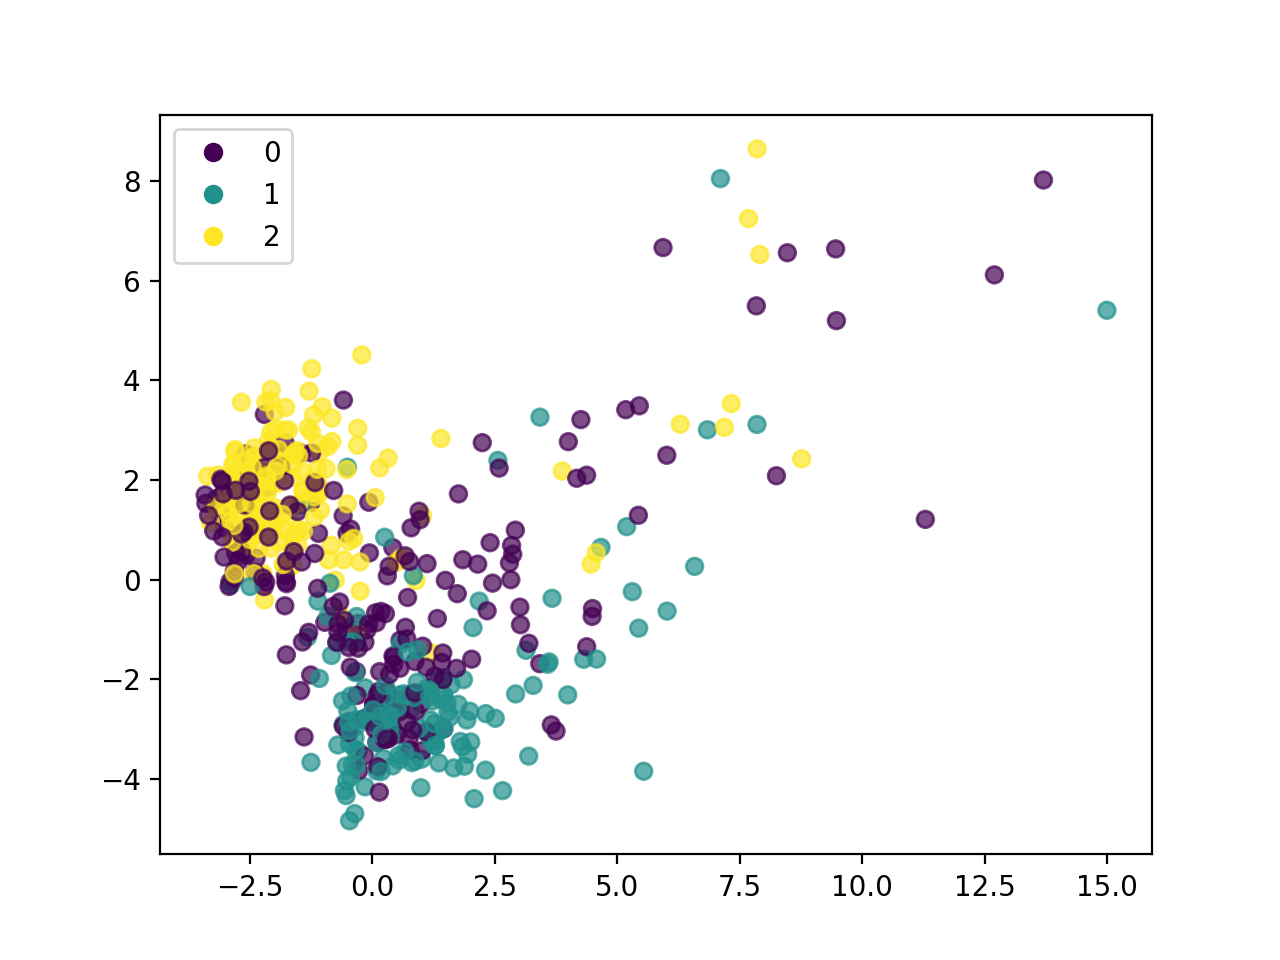

In [77]:
fig2, ax2 = plt.subplots()
scatter = ax2.scatter(X6_mdl22.iloc[:,0], X6_mdl22.iloc[:,1], c= X6_mdl22.loc[:,'labels'], alpha=0.7)
labels = np.unique(X6_mdl22.loc[:,'labels'])
handles = [plt.Line2D([],[],marker="o", ls="", 
                      color=scatter.cmap(scatter.norm(i))) for i in labels]
ax2.legend(handles, labels)

### Finding 4: From the visualization, data 1& model 12 (all dense data set with scaling of binary features) performs better than data 2 & model 22  (mix of dense and sparese features without scaling of binary features).